Much help from:
https://www.machinelearningplus.com/nlp/topic-modeling-visualization-how-to-present-results-lda-models/#6.-What-is-the-Dominant-topic-and-its-percentage-contribution-in-each-document

In [79]:
import gensim

#need to rerun both models while actually changing file names
dictionary = gensim.corpora.Dictionary.load('dictionary_body_title_7.gensim')
corpus = gensim.corpora.MmCorpus('corpus_body_title_7.mm') 
lda3 = gensim.models.ldamodel.LdaModel.load('model_body_title_3.gensim')
lda7 = gensim.models.ldamodel.LdaModel.load('model_body_title_7.gensim')

What is the dominant topic, and its percentage contribution in each document?

for title and body

In [3]:
# read in saved tokens and save into data
data = []
with open('data/tokenized_body_title_edited.csv') as f:
    for line in f:
        split_line = line.split(",")

        tokens = []
        for token in split_line:
            if len(token) > 0 and token != "\n":
                tokens.append(token)

        data.append(tokens)

In [68]:
def get_dominant_topic(lda=None, corpus=corpus):
    # initialize output DataFrame
    df = pd.DataFrame()
    
    # Get main topic in each document
    for row_number, row in enumerate(lda[corpus]):
        
        # row : a list of a series of tuples holding the topic(int) and its percentage(float) in the document
        row = sorted(row, key=lambda x: x[1], reverse=True) 
        
        # sort the row by percentage topic
                        
        # Get the dominant topic, percent contribution, and keywords for each document
        for j, (topic_num, perc_topic) in enumerate(row): 
            # we only want the dominant topic, so just get the first tuple, which we find when j==0
            if j == 0: # => dominant topic
                topic_perc_tuple = lda.show_topic(topic_num)
                topic_keywords = ",".join([word for word, prop in topic_perc_tuple])
                df = df.append(pd.Series([ int(topic_num), round(perc_topic,4), topic_keywords ]), ignore_index=True)
            else:
                break
    df.columns =  ['Dominant_Topic', 'Percent_Contribution', 'Topic_Keywords']
    
    return df

In [69]:
import pandas as pd

dom_df = get_dominant_topic(lda=lda3, corpus=corpus)

dominant_df = dom_df.reset_index();
dominant_df.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords'];

In [58]:
dominant_df

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords
0,0,0.0,0.9861,"like,fuck,people,want,know,work,time,feel,make,go"
1,1,2.0,0.6623,"post,people,make,would,reddit,comment,even,thi..."
2,2,2.0,0.9750,"post,people,make,would,reddit,comment,even,thi..."
3,3,0.0,0.3333,"like,fuck,people,want,know,work,time,feel,make,go"
4,4,0.0,0.9188,"like,fuck,people,want,know,work,time,feel,make,go"
...,...,...,...,...
4423,4423,0.0,0.9609,"like,fuck,people,want,know,work,time,feel,make,go"
4424,4424,2.0,0.9176,"post,people,make,would,reddit,comment,even,thi..."
4425,4425,0.0,0.3333,"like,fuck,people,want,know,work,time,feel,make,go"
4426,4426,2.0,0.6872,"post,people,make,would,reddit,comment,even,thi..."


Frequency Distribution of Word Counts in Documents

In [63]:
contents = pd.Series(data)
contents

0      [iran, actually, regime, change, forum, think,...
1      [askaconservative, design, echo, chamber, fine...
2      [hate, booter, xbox, much, even, complain, rig...
3      [service, tourette, syndrome, case, uncontroll...
4      [eat, back, couch, come, try, food, stop, leg,...
                             ...                        
392    [reply, creepy, mods, erase, remove, https://f...
393    [post, creepy, mods, lock, remove, https://for...
394    [link, image, later, discussion, remove, https...
395    [stop, parking, damn, "spot, ""i'm", ready, st...
396    [catch, break, really, need, past, year, crazy...
Length: 397, dtype: object

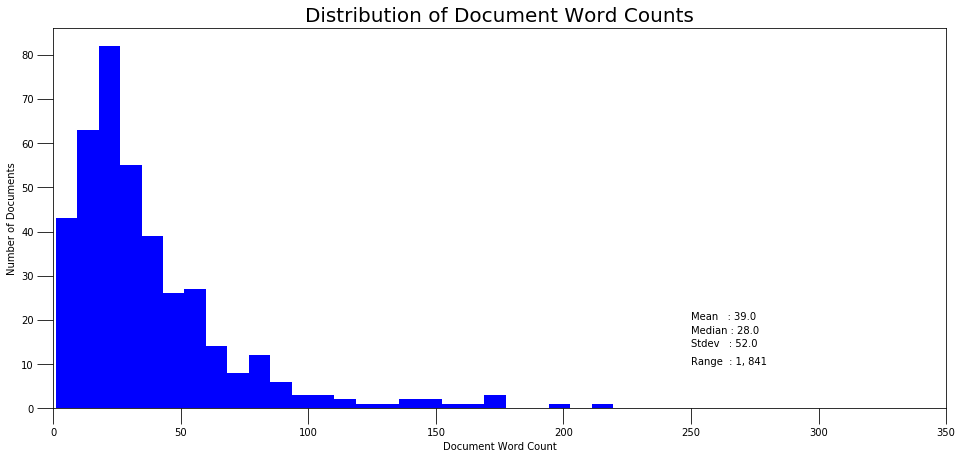

In [70]:
import matplotlib.pyplot as plt
import numpy as np

doc_lengths = [len(d) for d in data]

# Plot
plt.figure(figsize=(16,7))
plt.hist(doc_lengths, bins = 100, color='blue')
plt.text(250, 20, "Mean   : " + str(round(np.mean(doc_lengths))))
plt.text(250, 17, "Median : " + str(round(np.median(doc_lengths))))
plt.text(250, 14, "Stdev   : " + str(round(np.std(doc_lengths))))
plt.text(250, 10, "Range  : " + str(min(doc_lengths)) + ", " + str(max(doc_lengths)))
#plt.text(250, 1000, "1%ile    : " + str(round(np.quantile(doc_lengths, q=0.01))))
#plt.text(250, 500, "99%ile  : " + str(round(np.quantile(doc_lengths, q=0.99))))

plt.gca().set(xlim=(0, 150), ylabel='Number of Documents', xlabel='Document Word Count')
plt.tick_params(size=16)
plt.xticks(np.linspace(0,350,8))
plt.title('Distribution of Document Word Counts', fontdict=dict(size=20))
plt.show()

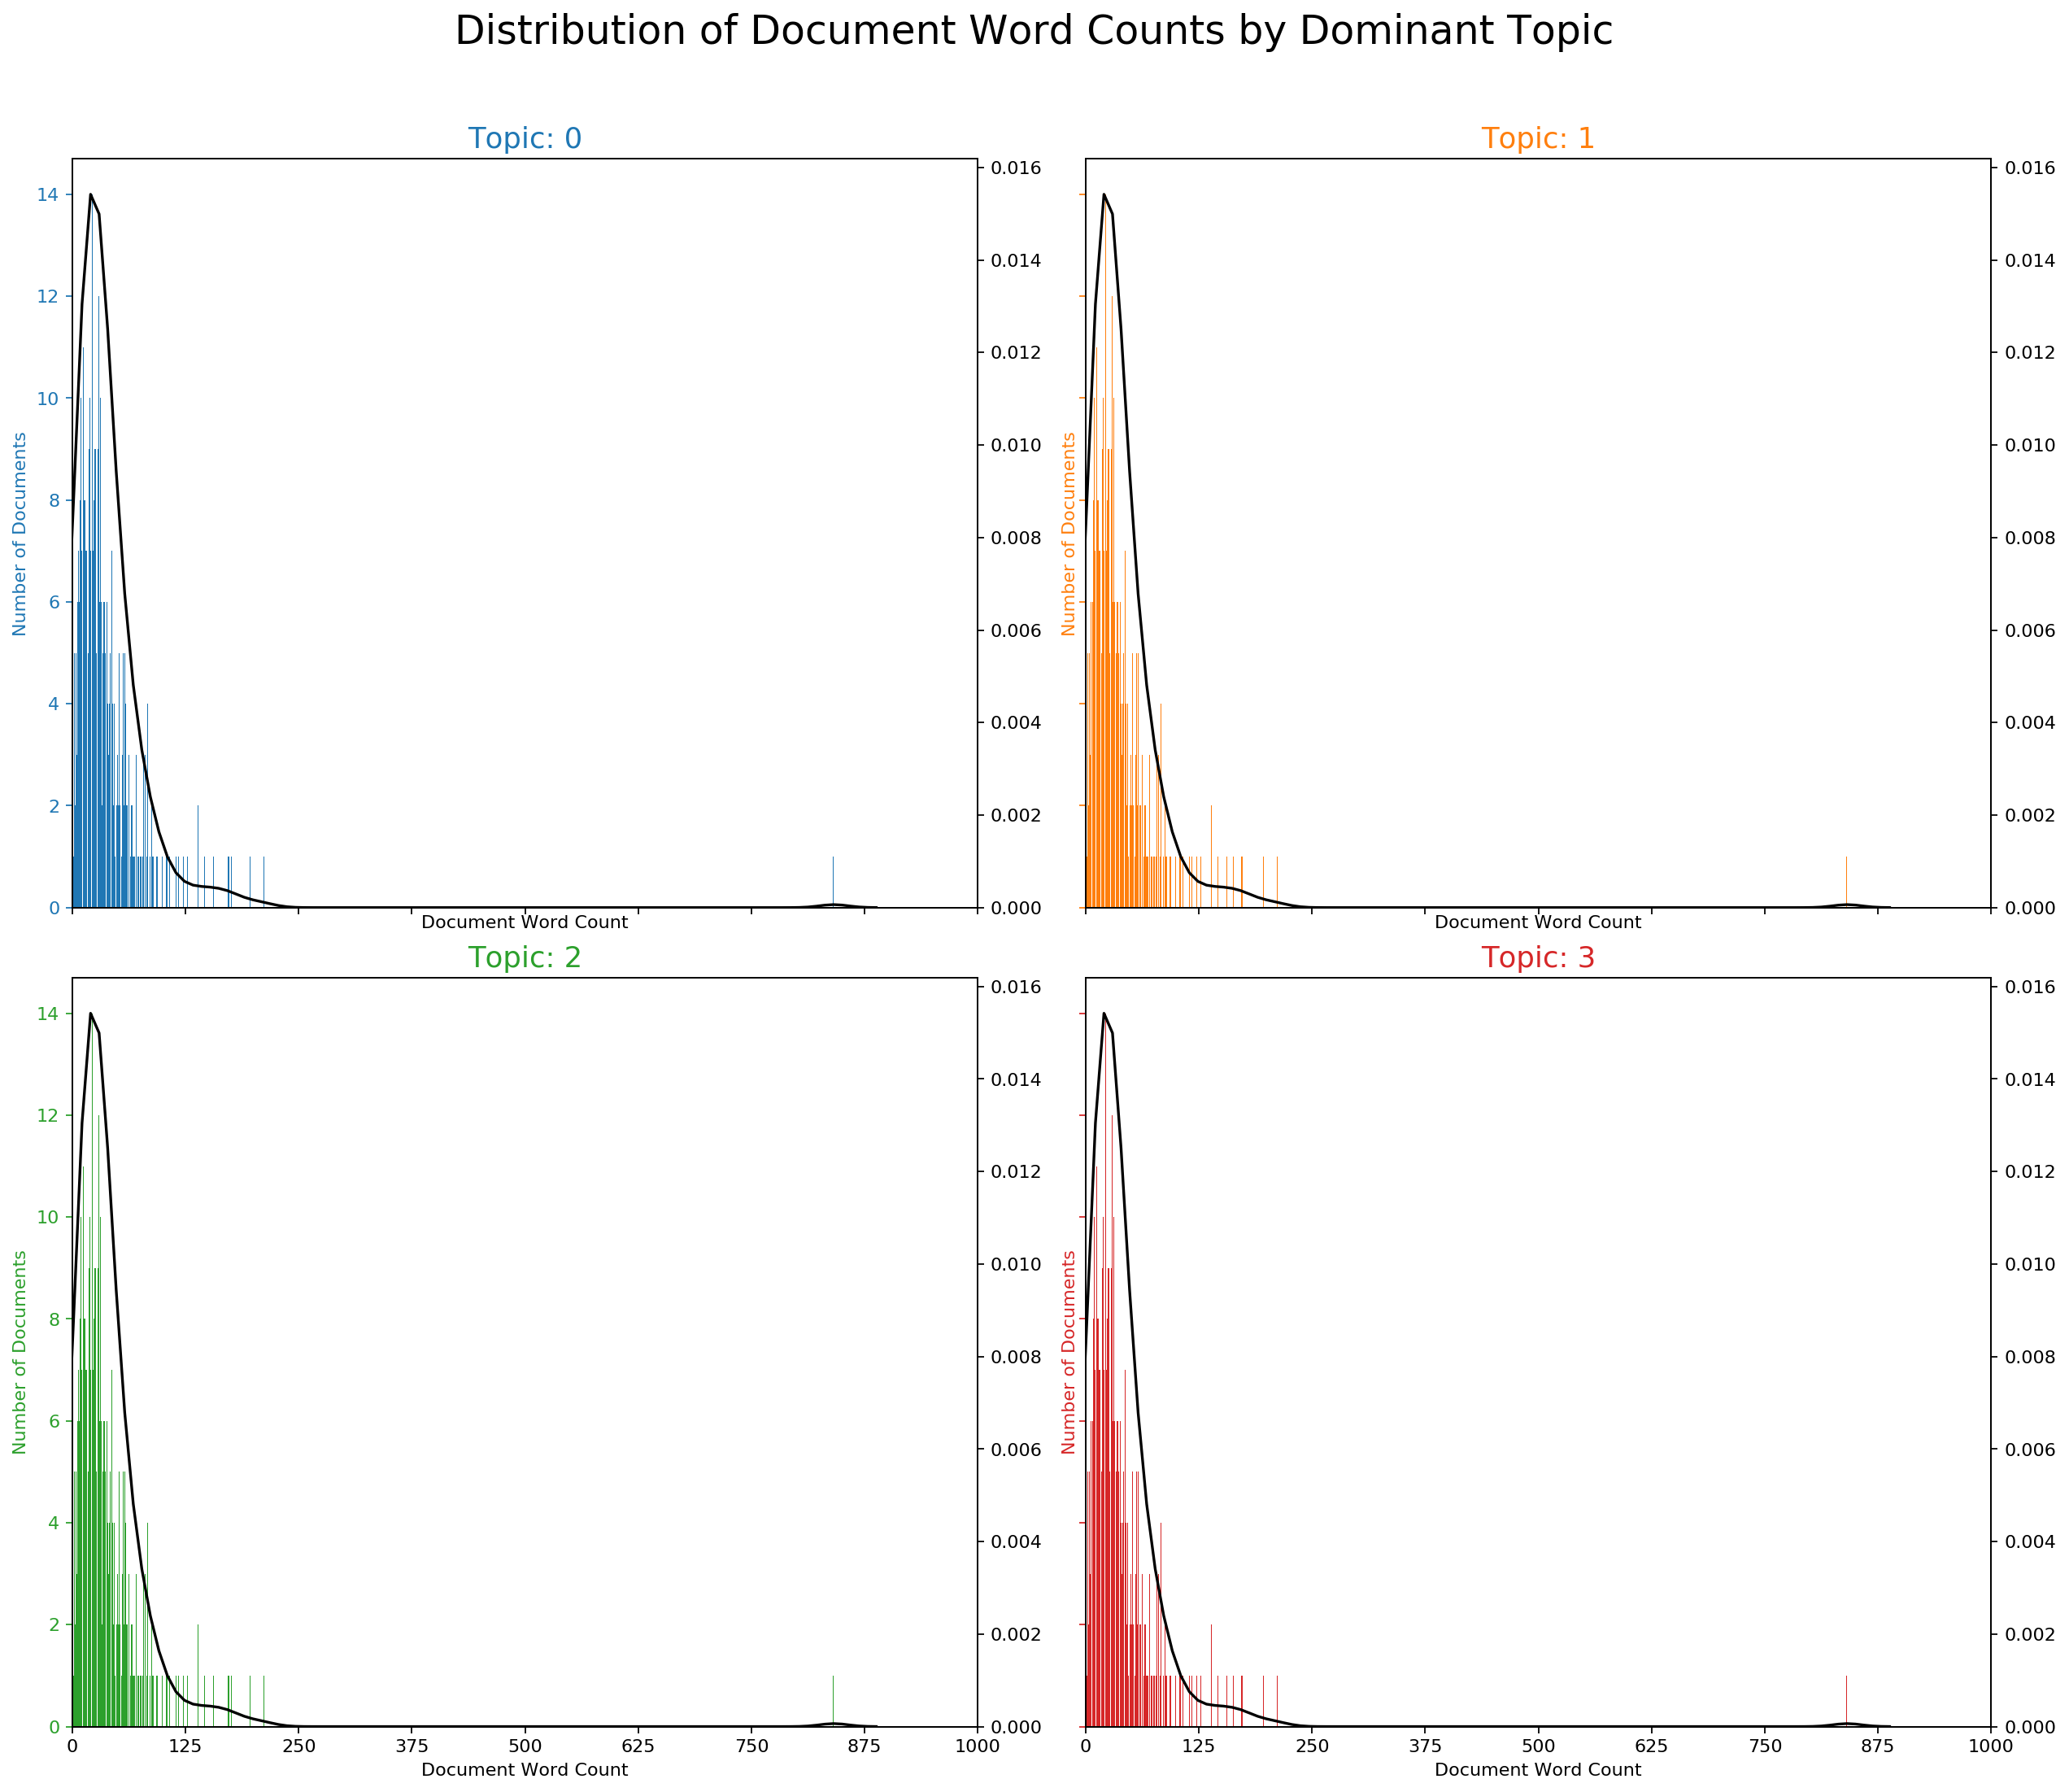

In [72]:
import seaborn as sns
import matplotlib.colors as mcolors
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

fig, axes = plt.subplots(2,2,figsize=(16,14), dpi=160, sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):    
    dominant_df = dominant_df.loc[dominant_df.Dominant_Topic == i, :]
    doc_lens = [len(d) for d in data]
    ax.hist(doc_lens, bins = 1000, color=cols[i])
    ax.tick_params(axis='y', labelcolor=cols[i], color=cols[i])
    sns.kdeplot(doc_lens, color="black", shade=False, ax=ax.twinx())
    ax.set(xlim=(0, 1000), xlabel='Document Word Count')
    ax.set_ylabel('Number of Documents', color=cols[i])
    ax.set_title('Topic: '+str(i), fontdict=dict(size=16, color=cols[i]))

fig.tight_layout()
fig.subplots_adjust(top=0.90)
plt.xticks(np.linspace(0,1000,9))
fig.suptitle('Distribution of Document Word Counts by Dominant Topic', fontsize=22)
plt.show()

**TO DO** I don't understand why I'm getting 4000+ documents when I definitely only have 1000, but I'll figure that out later. It means the graph above is a tad bit useless.  
Other ideas:
show topics clustered by time (could save index number, since posts are read in the same way every time, and map the dominant topic to its text) on a graph potentially  
give names to each of the topics  
compare different models (3, 7, 10)  


Word Clouds of Top N Keywords in Each Topic

In [73]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=STOPWORDS,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()


NameError: name 'lda' is not defined

Word Counts of Topic Keywords

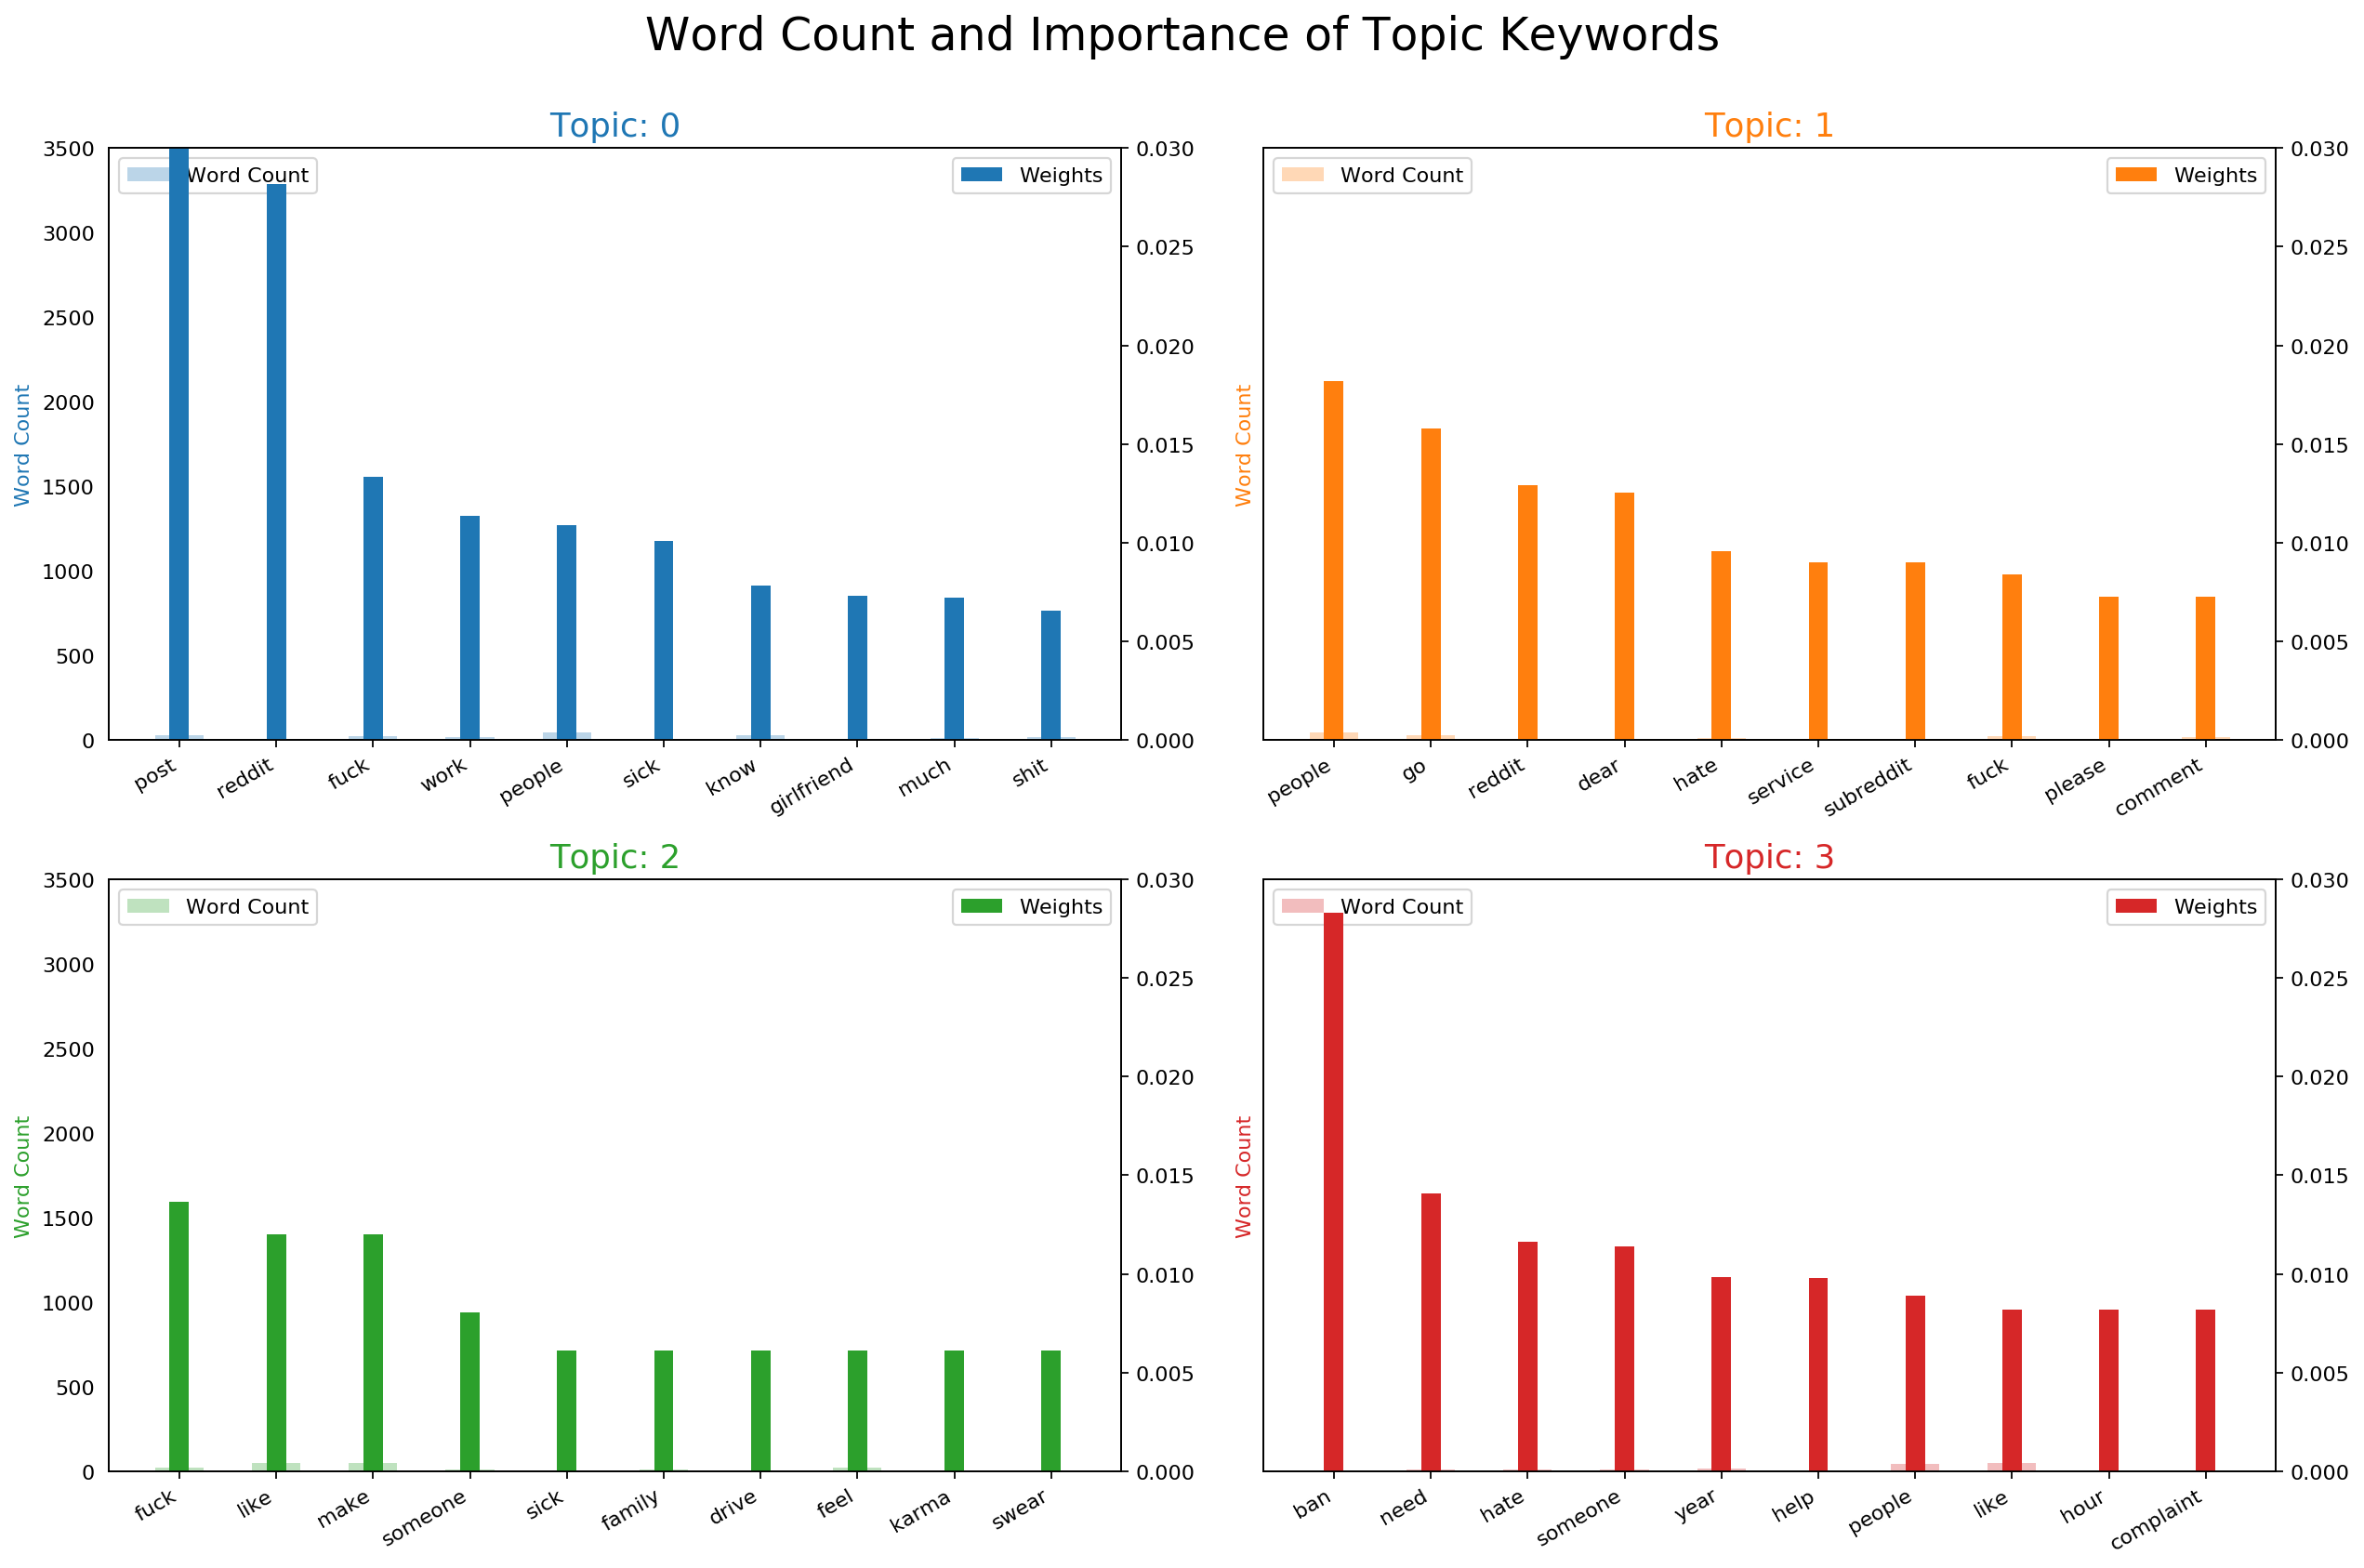

In [128]:
from collections import Counter
topics = lda.show_topics(formatted=False)
data_flat = [w for w_list in data for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        
F
# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(2, 2, figsize=(16,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()

**TO DO:** Need to get all these things to show more than 4 topics

T-SNE Clustering 

In [80]:
# Get topic weights and dominant topics ------------
from sklearn.manifold import TSNE
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook

# Get topic weights
topic_weights = []
for i, row_list in enumerate(lda7[corpus]):
    topic_weights.append([w for i, w in row_list[0]])

# Array of topic weights    
arr = pd.DataFrame(topic_weights).fillna(0).values

# Keep the well separated points (optional)
arr = arr[np.amax(arr, axis=1) > 0.35]

# Dominant topic number in each doc
topic_num = np.argmax(arr, axis=1)

# tSNE Dimension Reduction
tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
tsne_lda = tsne_model.fit_transform(arr)

# Plot the Topic Clusters using Bokeh
output_notebook()
n_topics = 4
mycolors = np.array([color for name, color in mcolors.TABLEAU_COLORS.items()])
plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics), 
              plot_width=900, plot_height=700)
plot.scatter(x=tsne_lda[:,0], y=tsne_lda[:,1], color=mycolors[topic_num])
show(plot)

TypeError: cannot unpack non-iterable int object